In [23]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['connect']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [146]:
def connect(d, group, dist, sigma=0.0):
    N = len(group)
    d[np.ix_(group,group)] = np.maximum(0.0, np.random.normal(dist, sigma, (N,N)))

In [170]:
def view_tsne(d, perplexity=5.0):
    tsne = TSNE(perplexity=perplexity, metric="precomputed") #, random_state=12337)
    y = tsne.fit_transform(d)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.axis('equal') # graph will appear distorted if axes are not equal
    ax.axis('off')   # the numerical values of the axes don't matter, so suppress them
    ax.scatter(y[:,0], y[:,1], s=200, color="#C0C0C0")
    for i in range(len(d)):
        ax.annotate(str(i), xy=y[i], horizontalalignment='center', verticalalignment='center', size=10)    

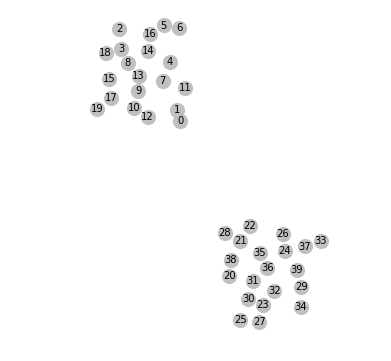

In [173]:
d1 = np.zeros((40,40))
connect(d1, range(40), 20.0, 5.0)
connect(d1, range(20), 5.0, 2.0)
connect(d1, range(20,40), 5.0, 2.0)
view_tsne(d1)

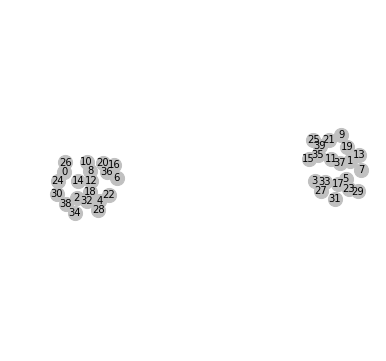

In [177]:
d2 = np.zeros((40,40))
connect(d2, range(40), 20.0, 5.0)
connect(d2, range(0,40,2), 5.0, 2.0)
connect(d2, range(1,40,2), 5.0, 2.0)
view_tsne(d2)

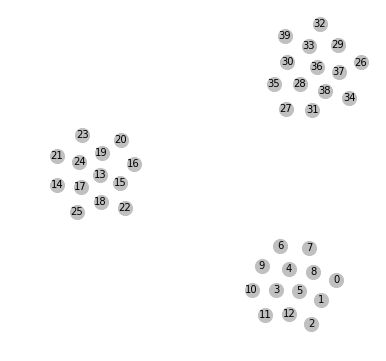

In [178]:
d3 = np.ones((40, 40)) * 20.0
connect(d3, range(0, 13), 5.0)
connect(d3, range(13, 26), 5.0)
connect(d3, range(26, 40), 5.0)
view_tsne(d3)

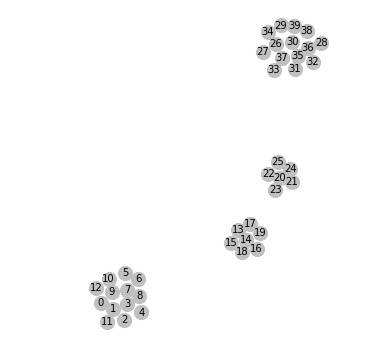

In [180]:
dc = (d1**1 + d3**1)**1
view_tsne(dc, perplexity=10.0)